In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import missingno as mno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [30]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [32]:
# voir les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [34]:
df.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [38]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


<Axes: >

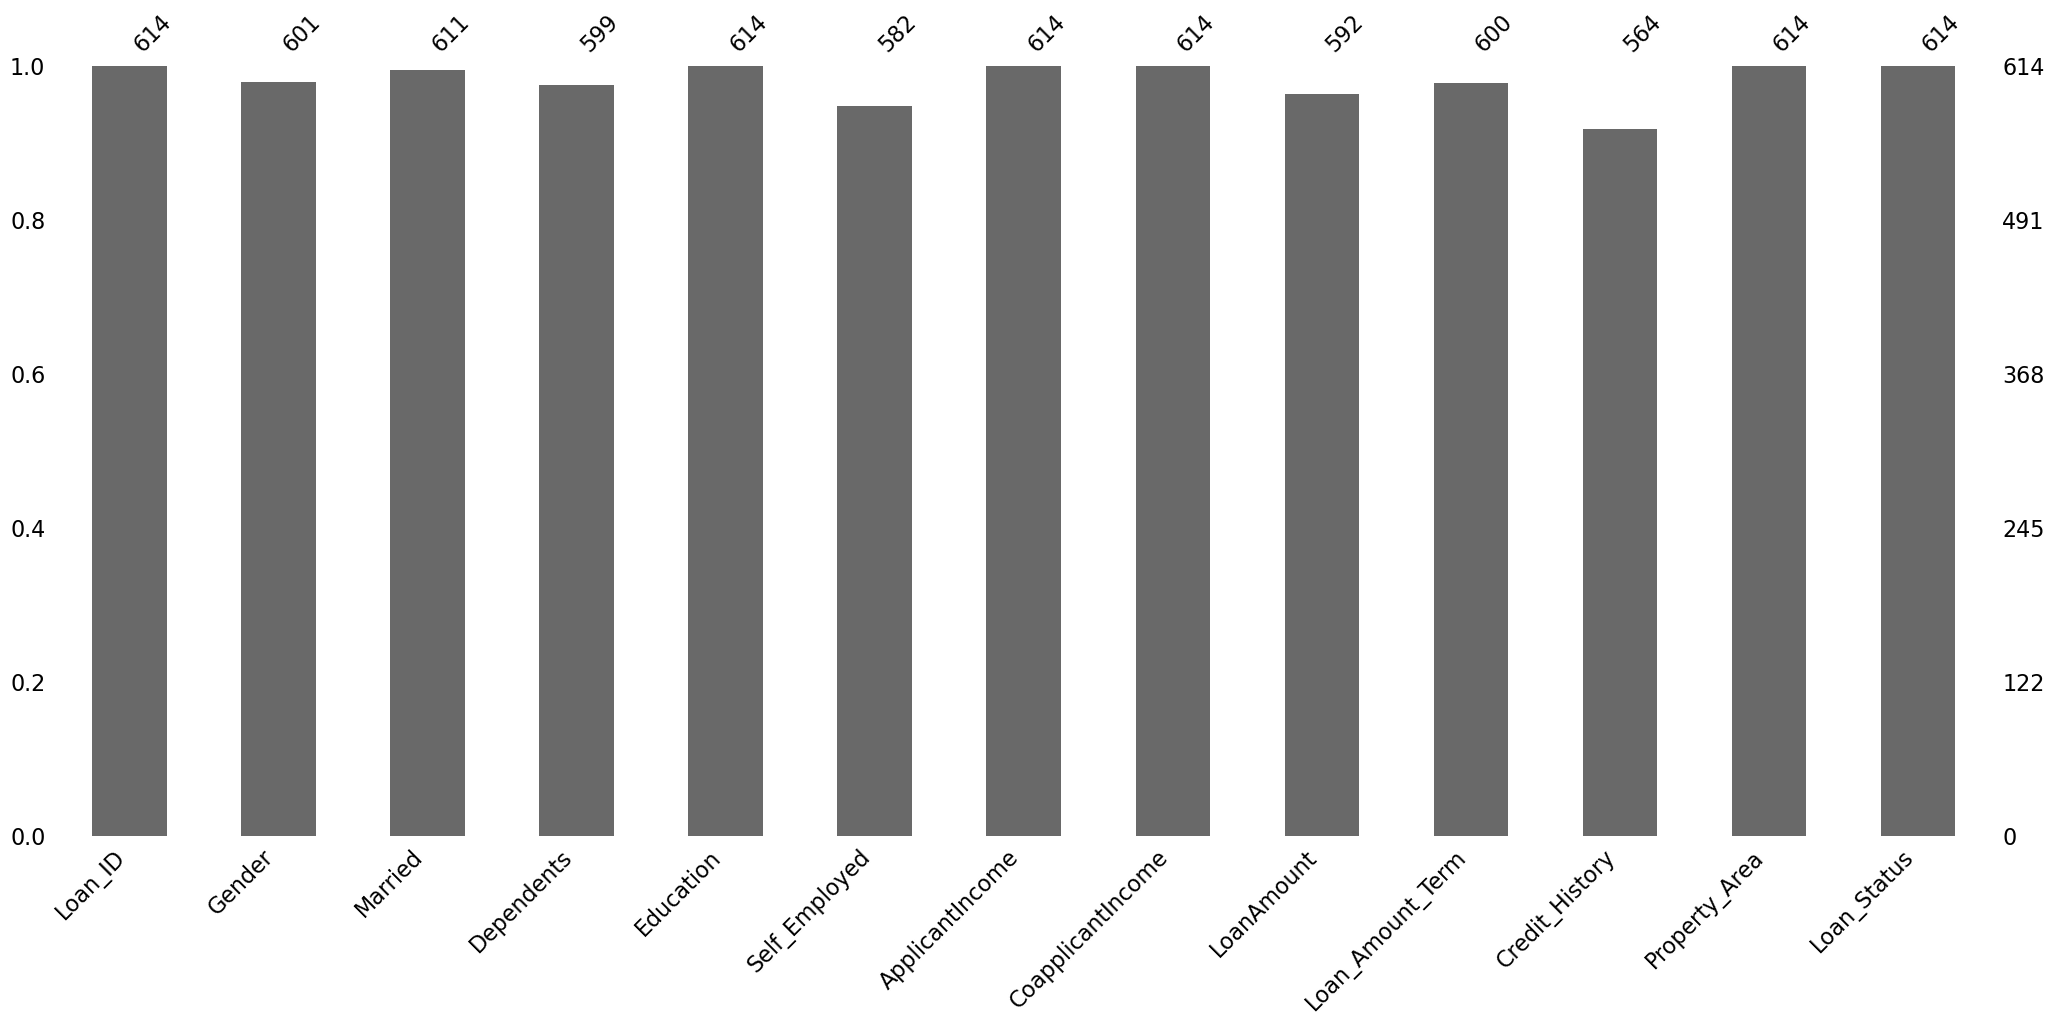

In [40]:
mno.bar(df)

In [42]:
 df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [44]:
# Renseigner les valeurs manquantes
cat_data = []
num_data = []

for i, c in enumerate(df.dtypes):
    if c==object:
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])

cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [46]:
cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
cat_data.isna().sum().any()

False

In [48]:
num_data.fillna(method='bfill', inplace=True)
cat_data.isnull().sum().any()

/tmp/ipykernel_6222/807040618.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data.fillna(method='bfill', inplace=True)


False

In [50]:
target = cat_data.pop('Loan_Status')
target.replace({'Y': 1, 'N': 0}, inplace=True)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [52]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001002,Male,No,0,Graduate,No,Urban
1,LP001003,Male,Yes,1,Graduate,No,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,Urban
4,LP001008,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural
610,LP002979,Male,Yes,3+,Graduate,No,Rural
611,LP002983,Male,Yes,1,Graduate,No,Urban
612,LP002984,Male,Yes,2,Graduate,No,Urban


In [56]:
# Remplacer les valeurs catégoriques par les valeurs numériques

le = LabelEncoder()

for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [58]:
cat_data.drop('Loan_ID', axis=1, inplace=True)

In [60]:
# Concatener cat_data et num_data puis spécifier la colonne target

X = pd.concat([cat_data, num_data], axis=1)
y = target

In [62]:
X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0


In [64]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [68]:
target.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

le pourcentage de credits accordés est 0.3127035830618892
le pourcentage de credits non accordés est 0.6872964169381107


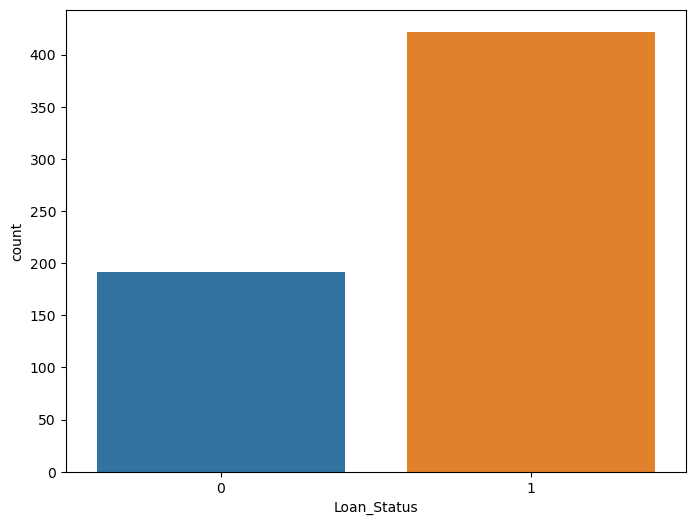

In [78]:
plt.figure(figsize=(8, 6))
sns.countplot(x=target)
yes = target.value_counts()[0]/len(target)
no = target.value_counts()[1]/len(target)
print(f'le pourcentage de credits accordés est {yes}')
print(f'le pourcentage de credits non accordés est {no}')

In [80]:
# la base de donnée utilisé pour l'EDA
df = pd.concat([cat_data, num_data, target], axis=1)

/home/morel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


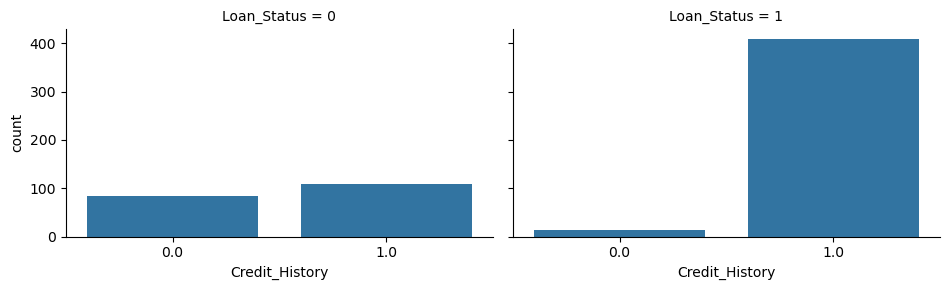

In [84]:
# Credit history
grid = sns.FacetGrid(data=df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Credit_History')

/home/morel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


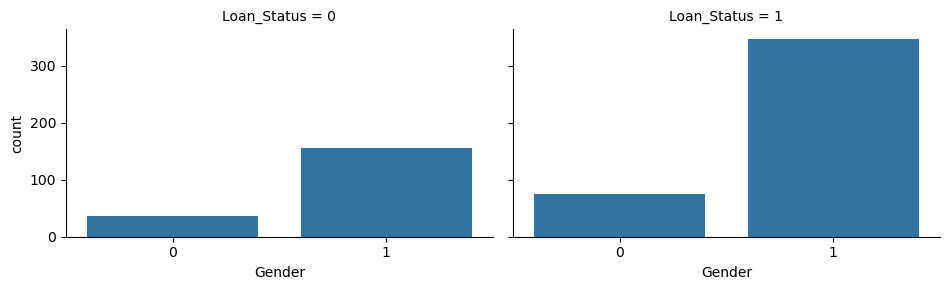

In [86]:
# Credit history
grid = sns.FacetGrid(data=df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Gender')

/home/morel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


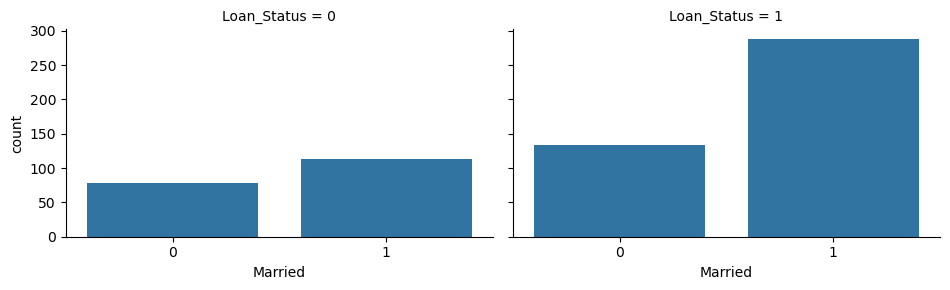

In [88]:
# Credit history
grid = sns.FacetGrid(data=df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Married')

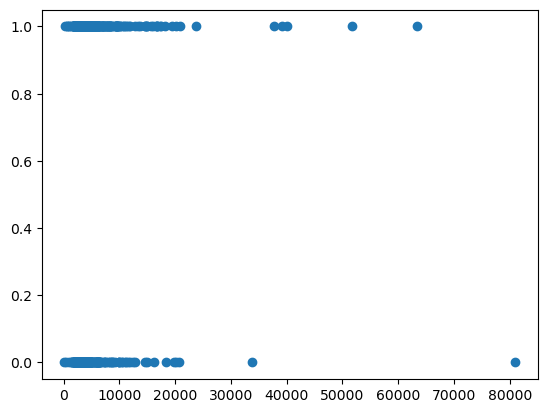

In [92]:
plt.scatter(df['ApplicantIncome'], df['Loan_Status'])